<a href="https://colab.research.google.com/github/JSEFERINO/UdeA/blob/main/04_Semana4_Dos_Teoremas_Limites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

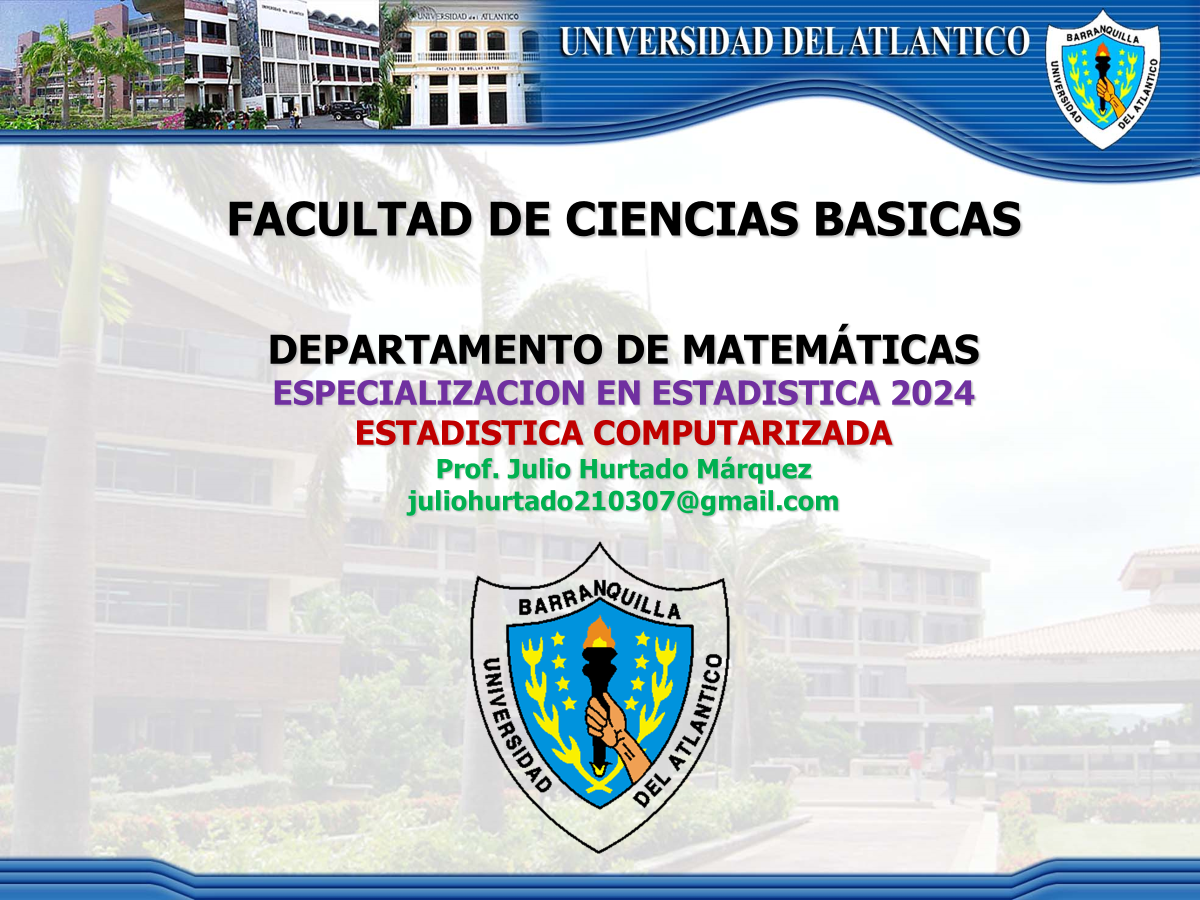

# **Los dos teoremas límite más importantes en probabilidad y estadística:**

### **1. La Ley de los Grandes Números (LGN)**

+ **Concepto básico**:
Este teorema nos dice que, a medida que aumentamos el número de veces que repetimos un experimento aleatorio (como lanzar una moneda), el promedio de los resultados observados se acercará al valor esperado o promedio teórico del experimento.

+ **Ejemplo fácil de entender**:
Si lanzas una moneda muchas veces, es probable que al principio obtengas una cantidad desbalanceada de caras y cruces (quizás muchas caras seguidas). Sin embargo, cuanto más lances la moneda, la proporción de caras y cruces se aproximará a 50% cada una. Es decir, el promedio de los resultados se estabiliza cerca de lo que esperarías teóricamente (en una moneda justa, 50% caras y 50% cruces).

+ **En resumen**:
Cuantas más veces repitas un experimento, más cerca estarán tus resultados del valor esperado.

---

### **2. Teorema del Límite Central (TLC)**

+ **Concepto básico**:
Este teorema nos dice que si tomamos promedios de muchas muestras independientes y aleatorias, sin importar la distribución original de los datos, esos promedios se distribuirán de forma **aproximadamente normal** (siguiendo una campana simétrica) si las muestras son suficientemente grandes.

+ **Ejemplo fácil de entender**:
Imagina que estás midiendo la altura de grupos de personas. Si tomas varias muestras pequeñas (de 5 o 10 personas), los promedios de altura pueden variar mucho. Pero si tomas muchas muestras grandes (de 100 o más personas), la distribución de esos promedios de altura empezará a formar una curva simétrica con un "pico" en el promedio real de altura. Este comportamiento ocurre independientemente de cómo se distribuya la altura en la población (puede ser muy desigual, pero los promedios tenderán a formar una distribución normal).

+ **En resumen**:
Cuando se toman suficientes muestras grandes, sus promedios se comportan como si provinieran de una distribución normal, sin importar cómo sea la distribución original.

---

## **Relación entre ambos teoremas:**
- **La Ley de los Grandes Números** nos garantiza que, a medida que repetimos un experimento, nuestro promedio de resultados converge al valor esperado.
- **El Teorema del Límite Central** nos dice que cuando tomamos muchos promedios de muestras grandes, esos promedios tienden a distribuirse de manera normal (en forma de campana).

+ _Ambos teoremas son fundamentales para comprender cómo funcionan las estadísticas en la vida real y por qué podemos confiar en los resultados basados en muestras._

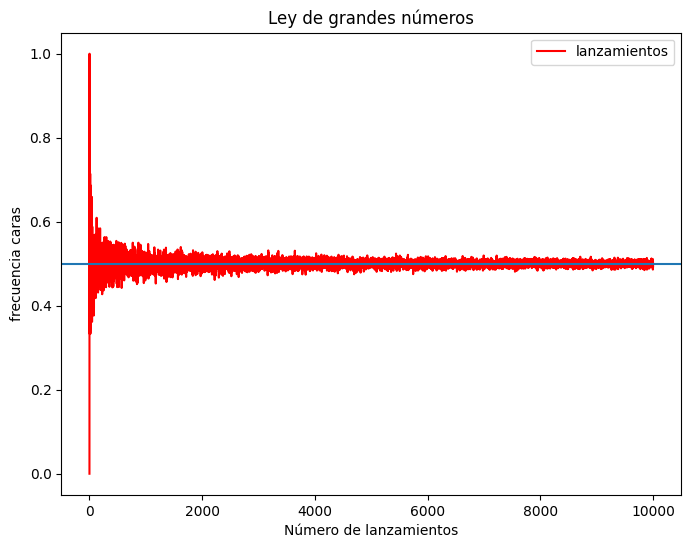

In [ ]:
# @title **Ejemplo ley de grandes números - Lanzando Un dado**
# moneda p=1/2 cara=1 seca=0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos)
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

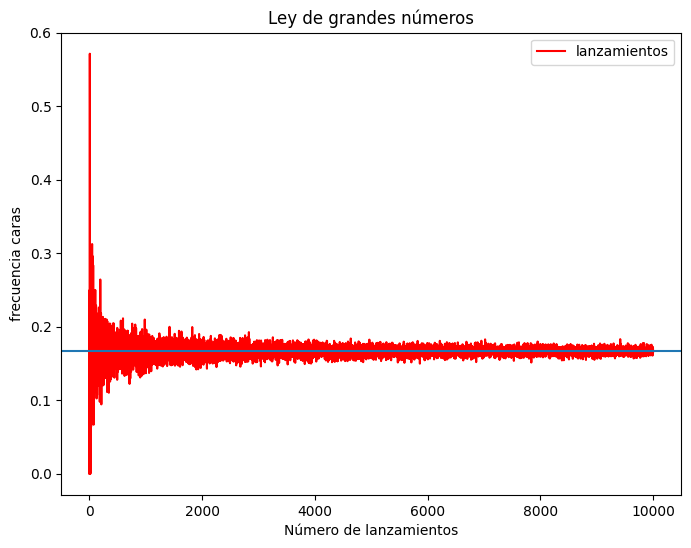

In [ ]:
# @ **Ejemplo Lanzamiento de una moneda p=1/6**
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6])
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

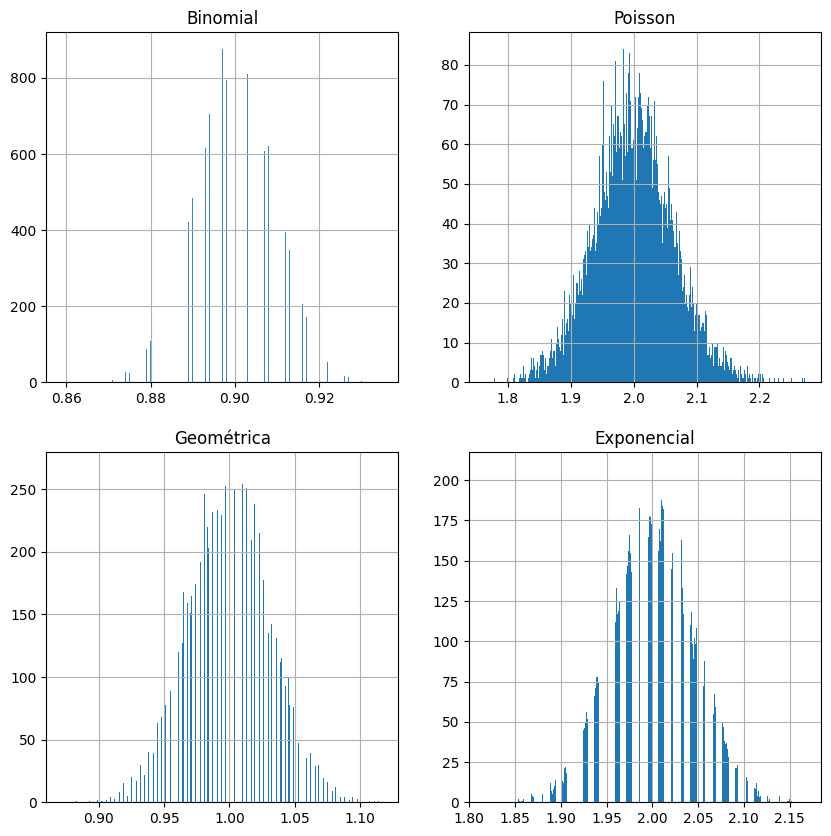

In [ ]:
# @ **Ejemplo teorema del límite central**
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []
mu = .9
lam = 1.0
size=1000

for i in range(1,20000):
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_possion.append(muestra.mean())

df = pd.DataFrame({ 'binomial' : muestra_binomial,
                     'poission' : muestra_possion,
                     'geometrica' : muestra_geometric,
                    'exponencial' : muestra_exp})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.exponencial.hist(ax=axes[0,1],bins=1000)
df.poission.hist(ax=axes[1,0],bins=1000)
df.geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geométrica')
axes[1,1].set_title('Exponencial')
plt.show()

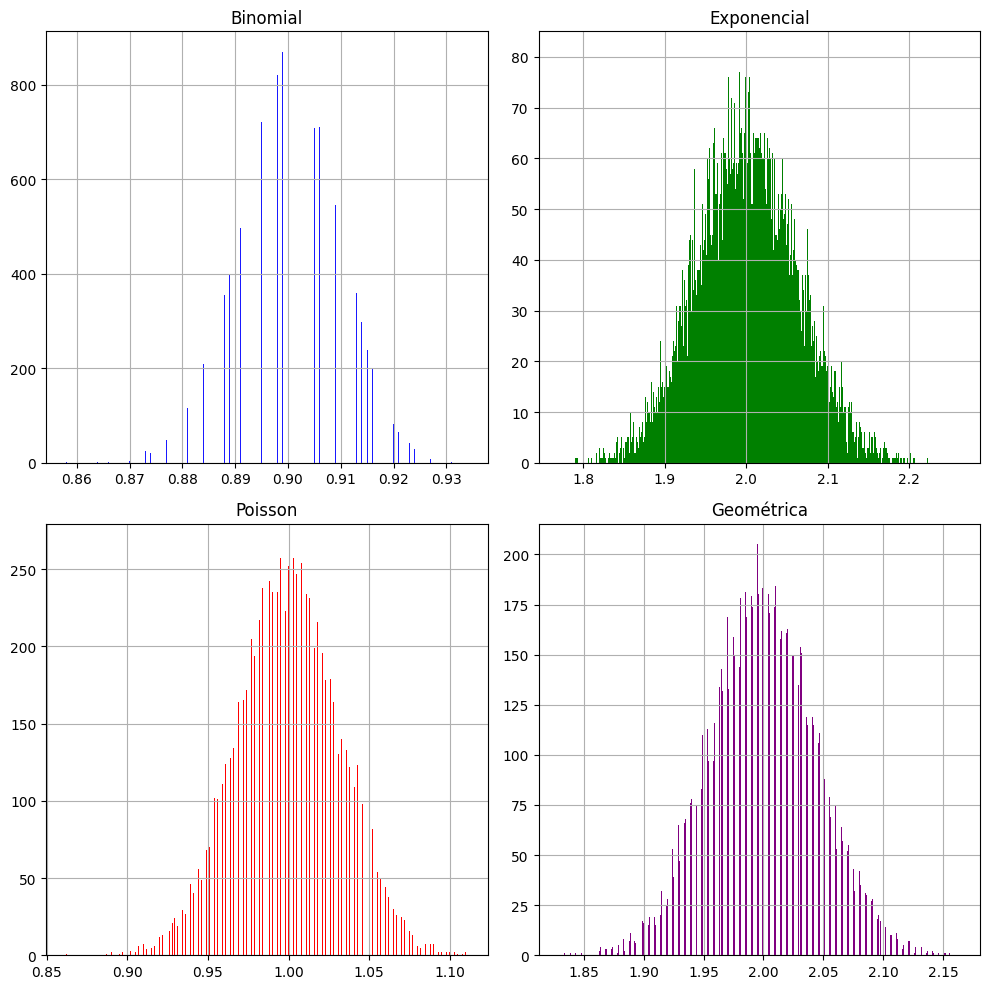

In [ ]:
# @ **Ejemplo teorema del límite central**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar listas para almacenar las medias muestrales
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []

# Parámetros de las distribuciones
mu = 0.9  # Para la distribución binomial
lam = 1.0  # Para la distribución de Poisson
size = 1000  # Tamaño de la muestra

# Simulaciones
for i in range(1, 20000):
    # Distribución binomial
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())

    # Distribución exponencial
    muestra = np.random.exponential(scale=2.0, size=size)
    muestra_exp.append(muestra.mean())

    # Distribución geométrica
    muestra = np.random.geometric(p=0.5, size=size)
    muestra_geometric.append(muestra.mean())

    # Distribución Poisson
    muestra = np.random.poisson(lam=lam, size=size)
    muestra_possion.append(muestra.mean())

# Crear un DataFrame con los resultados
df = pd.DataFrame({
    'binomial': muestra_binomial,
    'poisson': muestra_possion,
    'geometrica': muestra_geometric,
    'exponencial': muestra_exp
})

# Crear histogramas de las medias de las muestras
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Histograma para la distribución binomial
df.binomial.hist(ax=axes[0, 0], alpha=0.9, bins=1000, color='blue')
axes[0, 0].set_title('Binomial')

# Histograma para la distribución exponencial
df.exponencial.hist(ax=axes[0, 1], bins=1000, color='green')
axes[0, 1].set_title('Exponencial')

# Histograma para la distribución de Poisson
df.poisson.hist(ax=axes[1, 0], bins=1000, color='red')
axes[1, 0].set_title('Poisson')

# Histograma para la distribución geométrica
df.geometrica.hist(ax=axes[1, 1], bins=1000, color='purple')
axes[1, 1].set_title('Geométrica')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


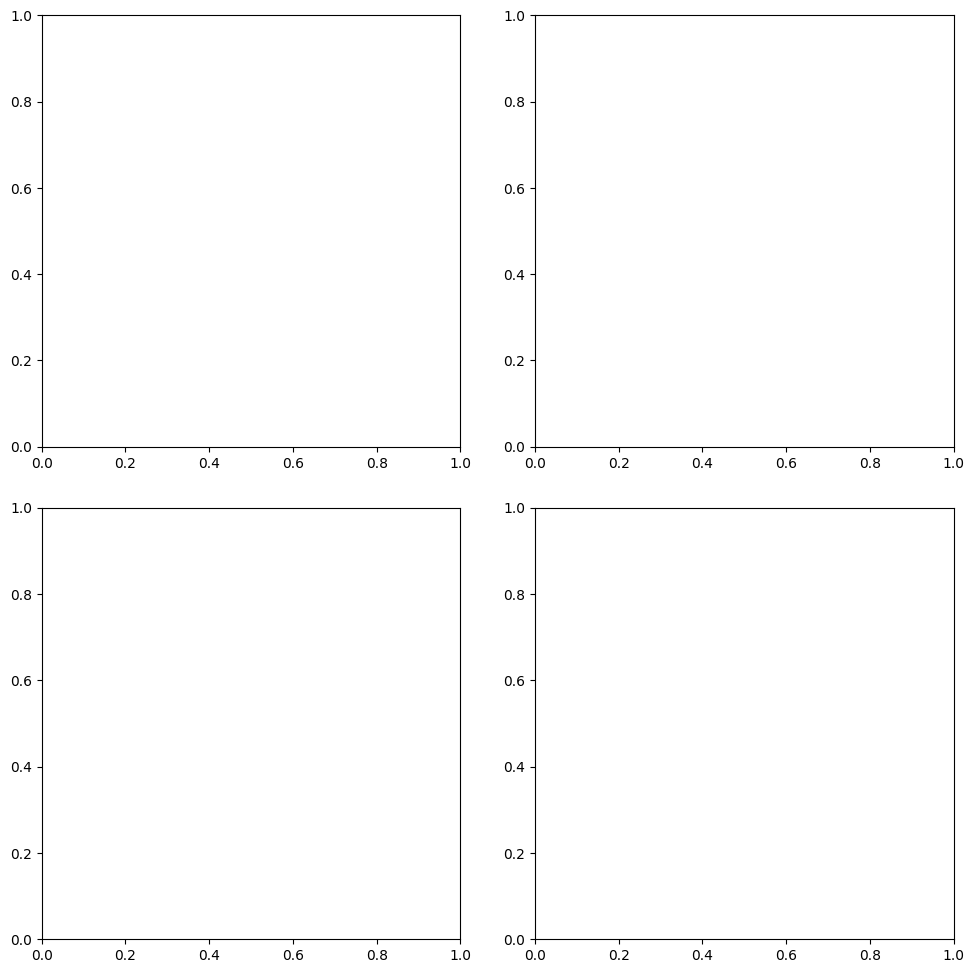

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Inicializar listas para almacenar las medias muestrales
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []

# Parámetros de las distribuciones
mu = 0.9  # Para la distribución binomial
lam = 1.0  # Para la distribución de Poisson
size = 1000  # Tamaño de la muestra
n_muestras = 20000  # Número total de muestras

# Simulaciones para generar las medias muestrales
for i in range(1, n_muestras):
    # Distribución binomial
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())

    # Distribución exponencial
    muestra = np.random.exponential(scale=2.0, size=size)
    muestra_exp.append(muestra.mean())

    # Distribución geométrica
    muestra = np.random.geometric(p=0.5, size=size)
    muestra_geometric.append(muestra.mean())

    # Distribución Poisson
    muestra = np.random.poisson(lam=lam, size=size)
    muestra_possion.append(muestra.mean())

# Crear el DataFrame con los resultados
df = pd.DataFrame({
    'binomial': muestra_binomial,
    'poisson': muestra_possion,
    'geometrica': muestra_geometric,
    'exponencial': muestra_exp
})

# Configurar la figura para la animación
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Inicializar los histogramas vacíos
hist_binom, = axes[0, 0].plot([], [], lw=2)
hist_exp, = axes[0, 1].plot([], [], lw=2)
hist_pois, = axes[1, 0].plot([], [], lw=2)
hist_geom, = axes[1, 1].plot([], [], lw=2)

# Configuración de límites para los ejes
axes[0, 0].set_xlim(0, 1)
axes[0, 0].set_ylim(0, 1000)
axes[0, 1].set_xlim(0, 4)
axes[0, 1].set_ylim(0, 1000)
axes[1, 0].set_xlim(0, 2)
axes[1, 0].set_ylim(0, 1000)
axes[1, 1].set_xlim(0, 4)
axes[1, 1].set_ylim(0, 1000)

axes[0, 0].set_title('Binomial')
axes[0, 1].set_title('Exponencial')
axes[1, 0].set_title('Poisson')
axes[1, 1].set_title('Geométrica')

# Función de inicialización para la animación
def init():
    for ax in axes.flatten():
        ax.clear()
    return hist_binom, hist_exp, hist_pois, hist_geom

# Función de actualización para la animación
def update(frame):
    # Actualizar histograma para la distribución Binomial
    axes[0, 0].cla()
    axes[0, 0].hist(df['binomial'][:frame], bins=50, color='blue', alpha=0.7)
    axes[0, 0].set_title('Binomial')

    # Actualizar histograma para la distribución Exponencial
    axes[0, 1].cla()
    axes[0, 1].hist(df['exponencial'][:frame], bins=50, color='green', alpha=0.7)
    axes[0, 1].set_title('Exponencial')

    # Actualizar histograma para la distribución Poisson
    axes[1, 0].cla()
    axes[1, 0].hist(df['poisson'][:frame], bins=50, color='red', alpha=0.7)
    axes[1, 0].set_title('Poisson')

    # Actualizar histograma para la distribución Geométrica
    axes[1, 1].cla()
    axes[1, 1].hist(df['geometrica'][:frame], bins=50, color='purple', alpha=0.7)
    axes[1, 1].set_title('Geométrica')

    plt.tight_layout()
    return hist_binom, hist_exp, hist_pois, hist_geom

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=np.arange(100, n_muestras, 100), init_func=init, blit=False, interval=100)

# Mostrar la animación en Jupyter Notebook
HTML(ani.to_html5_video())
